In [2]:
using Distributed
ifelse(nprocs()<2, addprocs(3), nothing);

In [3]:
using Plots
using LinearAlgebra
# using Revise
using LatticeQM

# Tutorial: Twisted honeycomb lattices

In [4]:
lat = Geometries2D.honeycomb_twisted(8)

Twist α=3.89°   (n,m)=(8,1)


Lattice dimension:     2
Space dimension:       3
Number of atoms:       868
Non-spatial dimension: 2
Basis:
3×3 Array{Float64,2}:
 25.5147       12.7574  0.0
 -8.74155e-15  22.0964  0.0
  0.0           0.0     1.0
Orbital/atom coordinates: 
5×868 Array{Float64,2}:
 0.0  0.0399386  0.0414747  0.0814132  …   0.884793   0.961598   0.963134
 0.0  0.998464   0.0368664  0.0353303      0.995392   0.998464   0.958525
 1.5  1.5        1.5        1.5           -1.5       -1.5       -1.5
 0.0  1.0        0.0        1.0            0.0        1.0        0.0
 0.0  0.0        0.0        0.0            1.0        1.0        1.0

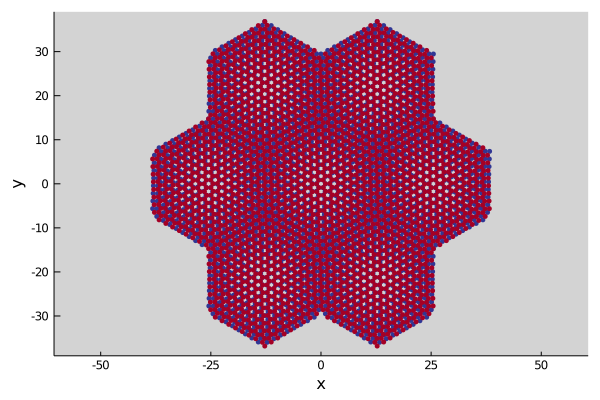

In [5]:
Structure.Lattices.foldPC!(lat; shift=[1/3,1/3,0])
plot(lat, 3; supercell=Structure.Lattices.getneighborcells(lat, 1; halfspace=false, innerpoints=true), sort="layer", markersize=3)

## Model

In [6]:
hops = Operators.graphene(lat; tz=0.45, format=:sparse, mode=:nospin) # specifying format is important here!

nothing

In [7]:
# Observables
valley = Operators.valleyoperator(lat; spinhalf=false);

MethodError: MethodError: no method matching valleyoperator(::LatticeQM.Structure.Lattices.Lattice; spinhalf=false)
Closest candidates are:
  valleyoperator(::Any...) at deprecated.jl:41 got unsupported keyword argument "spinhalf"

### Bands

In [8]:
ks = kpath(lat, ["μ2", "γ", "κ", "κ'", "γ", "μ"]; num_points=100)
bands = getbands(hops, ks, valley; format=:sparse, num_bands=25)

UndefVarError: UndefVarError: valley not defined

In [9]:
plot(bands; size=(300,250), markercolor=:diverging_bkr_55_10_c35_n256, colorbar=true)

UndefVarError: UndefVarError: bands not defined

In [10]:
hops = Operators.graphene(lat; mode=:spinhalf, format=:sparse, tz=0.45)
Operators.addrashba!(hops, lat, r -> 0.04 * sign(r[3]))
Operators.addzeeman!(hops, lat, r -> 0.04 * [0.0, 0.0, sign(r[3])])

kgrid = LatticeQM.Utils.randomgrid(;nk=8^2, rot_symmetry=6, B=Structure.getB(lat))
ωs = collect(range(0.036, length=100, stop=0.038))
ldos = Spectrum.ldos(hops, kgrid, ωs; Γ=0.0005, format=:sparse, num_bands=25);

Random (symmetrized) k grid. # points: 60


TaskFailedException: TaskFailedException:
On worker 2:
KeyError: key LatticeQM [606d2a7e-9b17-11e9-1c5c-455b84f60309] not found
getindex at ./dict.jl:477 [inlined]
root_module at ./loading.jl:967 [inlined]
deserialize_module at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Serialization/src/Serialization.jl:912
handle_deserialize at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Serialization/src/Serialization.jl:812
deserialize at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Serialization/src/Serialization.jl:735
deserialize_datatype at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Serialization/src/Serialization.jl:1210
handle_deserialize at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Serialization/src/Serialization.jl:788
deserialize at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Serialization/src/Serialization.jl:735
handle_deserialize at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Serialization/src/Serialization.jl:795
deserialize at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Serialization/src/Serialization.jl:735 [inlined]
deserialize_msg at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Distributed/src/messages.jl:99
#invokelatest#1 at ./essentials.jl:712 [inlined]
invokelatest at ./essentials.jl:711 [inlined]
message_handler_loop at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Distributed/src/process_messages.jl:185
process_tcp_streams at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Distributed/src/process_messages.jl:142
#97 at ./task.jl:358
Stacktrace:
 [1] remotecall_fetch(::Function, ::Distributed.Worker, ::Function, ::Vararg{Any,N} where N; kwargs::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Distributed/src/remotecall.jl:390
 [2] remotecall_fetch(::Function, ::Distributed.Worker, ::Function, ::Vararg{Any,N} where N) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Distributed/src/remotecall.jl:382
 [3] remotecall_fetch(::Function, ::Int64, ::Function, ::Vararg{Any,N} where N; kwargs::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Distributed/src/remotecall.jl:417
 [4] remotecall_fetch at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Distributed/src/remotecall.jl:417 [inlined]
 [5] (::Distributed.var"#155#156"{typeof(+),LatticeQM.Spectrum.var"#59#62"{Float64,Array{Float64,1},Array{Float64,2},Array{Float64,1},LatticeQM.Algebra.var"#25#26"{Base.Iterators.Pairs{Symbol,Int64,Tuple{Symbol},NamedTuple{(:num_bands,),Tuple{Int64}}},LatticeQM.TightBinding.var"#17#18"{Dict{Array{Int64,1},AbstractArray{T,2} where T}}},RemoteChannel{Channel{Bool}}},UnitRange{Int64},Array{UnitRange{Int64},1},Int64,Int64})() at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/Distributed/src/macros.jl:270

In [11]:
plot(lat, ldos)

UndefVarError: UndefVarError: ldos not defined